# Multi-Linear regression with various methods
This is a very simple example of using two scipy tools for linear regression.
* numpy.linalg.lstsq
* statsmodels.OLS
* Analytic solution using Moore-Penrose generalized inverse 
* simple multiplicative matrix inverse
* sklearn.linear_model.LinearRegression

as well as

* simple inverse using pytorch on CPU and GPU
* moore-penrose inverse using pytorch on CPU and GPU

## Import libraries

In [215]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize, linalg
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

import torch
import torch.nn as nn

%matplotlib inline

## Generate random data of a sufficiently large size

In [216]:
#Sample data creation
#number of points 
n=int(1e5)
np.random.seed(42)
# x = np.random.normal(loc=0, scale=1.0, size=n) #+ np.random.normal(loc=1.0, scale=0.5, size=n)

In [217]:
# gen_data function:
# n = nb rows / samples
# categorical_features = array of tuples for (#classes, step factor between classes)
# binary_features = array of binary feature coefficients
# continous_features = array of feature coefficients
def gen_data(n, base=10000.0, categorical_features=[(5, 1200)], binary_features=[2000.0], continuous_features=[100.0]):
    
    # constant column
    features = np.ones((n, 1))
    
    # coeffs for predicting
    coeffs = np.array([base])
    
    # binary features
    for i, factor in enumerate(binary_features):
        
        feature0 = np.random.randint(0, 2, size=n) # 2 classes, 1 column with 0/1
        feature0 = np.array(feature0, dtype=float).reshape(n, 1)
        features = np.append(features, feature0, 1)
        coeffs = np.append(coeffs, [factor])
    
    # continuous feature
    for i, factor in enumerate(continuous_features):
        feature2 = np.random.normal(loc=10.0, scale=3.0, size=n)
        feature2 = np.array(feature2, dtype=float).reshape(n, 1)
        features = np.append(features, feature2, 1)
        coeffs = np.append(coeffs, [factor])
        
    # categorical features
    for i, (nclasses, factor) in enumerate(categorical_features):
        feature1 = np.random.randint(1, nclasses + 1, size=n) # 200 classes
        feature1d = pd.get_dummies(feature1)
        feature1d = np.array(feature1d.values, dtype=float)
        print('categorical features: %s' % feature1d.shape[1])
        features = np.append(features, feature1d, 1)
        coeffs = np.append(coeffs, np.array(range(1, factor * nclasses + 1, factor), dtype=float))

    print('total features size %s ' % features.shape[1])

    # predictions:
    y_actual = np.dot(features, coeffs)

    # drop the constant column, will be re-added in the algo
    x = features[:,1:]

    # add some noise to the actual values
    y = y_actual + np.random.normal(loc=0.0, scale=700.0, size=n)
    return x, y, y_actual

In [218]:
x, y, y_actual = gen_data(n, categorical_features=[(100, 25), (50, 55)], continuous_features=[500.0])

categorical features: 100
categorical features: 50
total features size 153 


### Draw few random sample points and plot

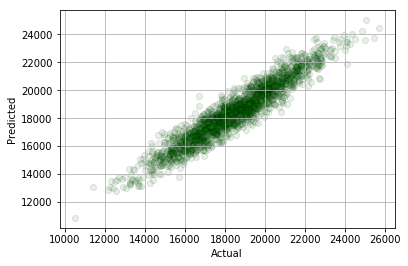

In [149]:
xvar=y[:2000]
yvar=y_actual[:2000]
# plt.scatter(x,y,c='green',edgecolors='k', alpha=0.2)
plt.scatter(xvar, yvar, c='green',edgecolors='k', alpha=0.1)
# plt.scatter(xr,yr,c='green',edgecolors='k', alpha=0.1)
# plt.plot(xline, xline)
plt.grid(True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.axis(option='square')
plt.show()

## Method PyTorch

In [96]:
# Xt = torch.Tensor(x)
# Yt = torch.Tensor(y.reshape(n, 1))

In [97]:
# Xt.size()

In [98]:
# Yt.size()

In [99]:
# model = nn.Linear(Xt.size(1), 1, bias=True)
# loss_fn = nn.MSELoss()
# optimizer = torch.optim.Adadelta(params=model.parameters(), lr=1000.0)
# # optimizer = torch.optim.SGB(params=model.parameters(), lr=2e-3, momentum=0.9)
# # optimizer = torch.optim.Adagrad(params=model.parameters(), lr=0.5, lr_decay=0, weight_decay=0, initial_accumulator_value=0)
# # optimizer = torch.optim.ASGD(params=model.parameters(), lr=0.001, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0)


In [100]:
# t = time.time()
# last_loss = 1e10
# y_pred = model.forward(Xt)
# loss = loss_fn(y_pred, Yt)
# while loss.item() <= last_loss :
#     last_loss = loss.item()
#     optimizer.zero_grad()
#     y_pred = model.forward(Xt)
#     loss = loss_fn(y_pred, Yt)
#     loss.backward()
#     optimizer.step()
#     print(loss.item())
# dt = time.time() - t
# print(dt)

In [101]:
# model.state_dict()

In [102]:
# y_pred = model.forward(torch.Tensor(xline.reshape(n, 1)))

In [103]:
# y_pred

## Method: numpy.linalg.lstsq

In [225]:
def linalg_lstsq(x, y, prt=True):
    t = time.time()
    A = np.ones((len(y), 1))
    A = np.append(A, x, 1)
    result = np.linalg.lstsq(A, y)
#     ar, br = result[0]
#     err = np.sqrt(result[1]/len(y))
    dt = time.time() - t 
    if prt:
        print('Linear regression using numpy.linalg.lstsq')
        print('parameters: {}'.format(result))
        print("Time taken: {} seconds".format(dt))
    return dt

In [226]:
t_linalg_lstsq = linalg_lstsq(x, y)

/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


Linear regression using numpy.linalg.lstsq
parameters: (array([ 6.97618975e+13,  2.00476172e+03,  5.00859375e+02, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.96997212e+13, -1.96997212e+13,
       -1.96997212e+13, -1.96997212e+13, -1.

In [106]:
t_linalg_lstsq = %timeit -o linalg_lstsq(x, y, prt=False)
t_linalg_lstsq_avg = t_linalg_lstsq.average
t_linalg_lstsq_std = t_linalg_lstsq.stdev

/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


735 ms ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Method: Statsmodels.OLS

In [182]:
def statsmodel_ols(x, y, prt=True):
    t = time.time()
    X = sm.add_constant(x)
    model = sm.OLS(y, X, hasconst=True, method='pinv')
    results = model.fit()
    ar = results.params[1]
    br = results.params[0]
    dt = time.time() - t
    if prt: 
        print('Linear regression using statsmodels.OLS')
        print('parameters: %s'% results.params)
        print("Time taken: {} seconds".format(dt)) 
        print(results.summary())
    return dt

In [183]:
t_OLS = statsmodel_ols(x, y)

Linear regression using statsmodels.OLS
parameters: [ 1.22112851e+04  2.00097456e+03  5.00871587e+02 -1.12201377e+03
 -1.12568023e+03 -1.07247505e+03 -1.07431373e+03 -1.02366645e+03
 -1.00072480e+03 -9.95273657e+02 -9.36960092e+02 -9.09303200e+02
 -8.78826683e+02 -9.04741764e+02 -8.35491056e+02 -8.35775611e+02
 -7.39918412e+02 -7.46522972e+02 -7.59284221e+02 -7.07751477e+02
 -6.87674029e+02 -6.95282233e+02 -6.21715612e+02 -6.02047624e+02
 -6.06128218e+02 -5.74032428e+02 -5.45453588e+02 -5.19066485e+02
 -4.93231104e+02 -4.51388075e+02 -4.58366192e+02 -3.96501305e+02
 -3.97989566e+02 -3.69667787e+02 -3.35267248e+02 -3.18897738e+02
 -2.80394107e+02 -2.65254074e+02 -2.77727340e+02 -2.14897107e+02
 -1.92701671e+02 -2.11120339e+02 -1.45617258e+02 -6.90634025e+01
 -1.02735956e+02 -6.69871850e+01 -4.53725413e+01 -1.05863003e+00
  1.21551185e+01  5.47291448e+01  2.63769366e+01  1.16626623e+02
  9.34279725e+01  1.40544593e+02  1.78346853e+02  1.69436074e+02
  1.84158729e+02  2.15854980e+02  2.82

In [55]:
t_OLS = %timeit -o statsmodel_ols(x, y, prt=False)
t_OLS_avg = t_OLS.average
t_OLS_std = t_OLS.stdev

1.74 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Analytic solution using Moore-Penrose pseudoinverse

In [190]:
def moore_penrose(x, y, prt=True):
    t=time.time()
    X = sm.add_constant(x)
    mpinv = np.linalg.pinv(X)
    m = mpinv.dot(y)
    dt = time.time() - t
    if prt:
        print('Linear regression using Moore-Penrose inverse')
        print('parameters: %s' % result)
        y_mean = y.mean()
        y_pred = m.dot(X.T)
        SSE = np.sum((y - y_pred)**2)
        SSTO = np.sum((y - y_mean)**2)
        R2 = 1 - (SSE / SSTO)
        print(R2)
        dt = time.time() - t
        print("Time taken: {} seconds".format(dt)) 
    return dt

In [191]:
t_inv_matrix = moore_penrose(x, y)

Linear regression using Moore-Penrose inverse
parameters: [ 1.22112851e+04  2.00097456e+03  5.00871587e+02 -1.12201377e+03
 -1.12568023e+03 -1.07247505e+03 -1.07431373e+03 -1.02366645e+03
 -1.00072480e+03 -9.95273657e+02 -9.36960092e+02 -9.09303200e+02
 -8.78826683e+02 -9.04741764e+02 -8.35491056e+02 -8.35775611e+02
 -7.39918412e+02 -7.46522972e+02 -7.59284221e+02 -7.07751477e+02
 -6.87674029e+02 -6.95282233e+02 -6.21715612e+02 -6.02047624e+02
 -6.06128218e+02 -5.74032428e+02 -5.45453588e+02 -5.19066485e+02
 -4.93231104e+02 -4.51388075e+02 -4.58366192e+02 -3.96501305e+02
 -3.97989566e+02 -3.69667787e+02 -3.35267248e+02 -3.18897738e+02
 -2.80394107e+02 -2.65254074e+02 -2.77727340e+02 -2.14897107e+02
 -1.92701671e+02 -2.11120339e+02 -1.45617258e+02 -6.90634025e+01
 -1.02735956e+02 -6.69871850e+01 -4.53725413e+01 -1.05863003e+00
  1.21551185e+01  5.47291448e+01  2.63769366e+01  1.16626623e+02
  9.34279725e+01  1.40544593e+02  1.78346853e+02  1.69436074e+02
  1.84158729e+02  2.15854980e+02

In [59]:
t_inv_matrix = %timeit -o moore_penrose(x, y, prt=False)
t_inv_matrix_avg = t_inv_matrix.average
t_inv_matrix_std = t_inv_matrix.stdev

1.62 s ± 84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Analytic solution using simple multiplicative matrix inverse

In [229]:
def simple_matrix_inverse(x, y, prt=True):
    t = time.time()
    X = sm.add_constant(x)
    m = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
#     m = np.matmul((np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T)), y)
    dt = time.time() - t
    if prt:
        y_mean = y.mean()
        y_pred = m.dot(X.T)
        SSE = np.sum((y - y_pred)**2)
        SSTO = np.sum((y - y_mean)**2)
        R2 = 1 - (SSE / SSTO)
        print(R2)
        print('Linear regression using simple inverse')
        print('parameters: %s '% m)
        print("Time taken: {} seconds".format(dt)) 
    return dt

In [231]:
X = sm.add_constant(x)


In [243]:
np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

array([ 2.66682347e+05, -6.66512423e+01,  8.89885968e+01,  5.33866606e+05,
       -3.60227898e+05, -2.34075026e+05,  5.46811129e+05, -2.69680976e+05,
       -6.17423004e+04, -5.07774754e+05,  3.13531440e+05,  2.26951692e+05,
        5.56548658e+04, -1.70595896e+05,  3.45418353e+03, -6.90523808e+05,
       -3.31856746e+05, -2.16153625e+05,  4.37894289e+05, -7.22344286e+04,
       -2.54980105e+05,  2.05427988e+05, -9.76418155e+05,  2.40410915e+05,
       -4.52932384e+04, -4.16008620e+05,  7.69626225e+05, -4.17189425e+05,
        1.00305111e+05, -1.08053985e+06,  7.61438919e+05, -4.60680649e+05,
        1.16558941e+05,  4.49794503e+05, -3.44377841e+04, -2.18735235e+05,
        7.46697948e+04,  4.59494055e+05,  6.31209104e+05,  2.53912640e+05,
        6.70777877e+05, -4.53865926e+04, -1.93472679e+05, -1.66158501e+05,
        1.36772481e+05, -1.13203896e+05, -6.90073156e+05,  3.87105575e+05,
        3.34909723e+05, -8.46974308e+05, -1.97033590e+05,  9.22307047e+04,
       -5.09198942e+05,  

In [ ]:
m = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# m = np.matmul((np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T)), y)
m

In [224]:
m.dot(X.T)

array([ 470654.92933851, 1140331.97561869,  -76795.41955728, ...,
        120486.71645411,  622018.58966826,  978064.22440265])

In [230]:
t_simple_inv = simple_matrix_inverse(x, y)

-57524.31425814817
Linear regression using simple inverse
parameters: [ 2.66682347e+05 -6.66512423e+01  8.89885968e+01  5.33866606e+05
 -3.60227898e+05 -2.34075026e+05  5.46811129e+05 -2.69680976e+05
 -6.17423004e+04 -5.07774754e+05  3.13531440e+05  2.26951692e+05
  5.56548658e+04 -1.70595896e+05  3.45418353e+03 -6.90523808e+05
 -3.31856746e+05 -2.16153625e+05  4.37894289e+05 -7.22344286e+04
 -2.54980105e+05  2.05427988e+05 -9.76418155e+05  2.40410915e+05
 -4.52932384e+04 -4.16008620e+05  7.69626225e+05 -4.17189425e+05
  1.00305111e+05 -1.08053985e+06  7.61438919e+05 -4.60680649e+05
  1.16558941e+05  4.49794503e+05 -3.44377841e+04 -2.18735235e+05
  7.46697948e+04  4.59494055e+05  6.31209104e+05  2.53912640e+05
  6.70777877e+05 -4.53865926e+04 -1.93472679e+05 -1.66158501e+05
  1.36772481e+05 -1.13203896e+05 -6.90073156e+05  3.87105575e+05
  3.34909723e+05 -8.46974308e+05 -1.97033590e+05  9.22307047e+04
 -5.09198942e+05  9.76931528e+04 -3.25011759e+05 -6.03860073e+04
  3.54664828e+05 -2.

In [62]:
t_simple_inv = %timeit -o simple_matrix_inverse(x, y, prt=False)
t_simple_inv_avg = t_simple_inv.average
t_simple_inv_std = t_simple_inv.stdev

283 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Method: sklearn.linear_model.LinearRegression

In [63]:
def sklearn_linear_regression(x, y, prt=True):
    t = time.time()
    lm = LinearRegression(normalize=True, fit_intercept=True, n_jobs=-1)
    X = sm.add_constant(x)
    lm.fit(X, y)
    ar = lm.coef_[1]
    br = lm.intercept_
    dt = time.time() - t
    
    if prt:
        print('Linear regression using sklearn.linear_model.LinearRegression')
        print('parameters: coeff=%s b=%.2f'% (lm.coef_, lm.intercept_))
        print("Time taken: {} seconds".format(dt)) 
    return dt

In [64]:
t_sklearn_linear = sklearn_linear_regression(x, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Linear regression using sklearn.linear_model.LinearRegression
parameters: coeff=[ 0.00000000e+00  2.00383207e+03  5.00855742e+02  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.96081528e+14  3.96081528e+14  3.96081528e+14  3.96081528e+14
  3.960815

In [65]:
t_sklearn_linear = %timeit -o sklearn_linear_regression(x, y, prt=False)
t_sklearn_linear_avg = t_sklearn_linear.average
t_sklearn_linear_std = t_sklearn_linear.stdev

1.14 s ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
print(torch.cuda.is_available())
is_cuda = torch.cuda.is_available()

False


In [ ]:
torch.cuda.device_count()

In [ ]:
torch.__version__

In [ ]:
cuda = torch.device('cuda:0')

In [67]:
def pytorch_matrix_inverse_cuda(x, y, prt=True):
    if not is_cuda: return 0
    t = time.time()
    n = x.shape[0]
    m = x.shape[1]
    x1 = np.append(np.ones((n, 1)), x.reshape((n, m)), 1)
    tx = torch.tensor(x1, device=cuda)
    ty = torch.tensor(y.reshape((n, 1)), device=cuda)
    m = ((tx.transpose(0, 1).mm(tx)).inverse()).mm(tx.transpose(0, 1).mm(ty))
    dt = time.time() - t
    if prt:
        print(m)
        print('GPU compute %f' % dt)
    return dt

In [204]:
def pytorch_matrix_inverse_cpu(x, y, prt=True):
    t = time.time()
    n = x.shape[0]
    m = x.shape[1]
    x1 = np.append(np.ones((n, 1)), x.reshape((n, m)), 1)
    tx = torch.from_numpy(x1)
    ty = torch.from_numpy(y.reshape((n, 1)))
    m = ((tx.transpose(0, 1).matmul(tx)).inverse()).matmul(tx.transpose(0, 1).matmul(ty))
    dt = time.time() - t
    if prt:
        y_mean = y.mean()
        y_pred = torch.tensordot(m, tx.transpose(0, 1), dims=1)
        SSE = torch.sum((ty - y_pred)**2)
        SSTO = torch.sum((ty - y_mean)**2)
        R2 = 1 - (SSE / SSTO)
        print(R2)

        print(m)
        print('GPU compute %f' % dt)
    return dt

In [205]:
def pytorch_moore_penrose_cuda(x, y, prt=True):
    if not is_cuda: return 0
    t = time.time()
    n = x.shape[0]
    m = x.shape[1]
    x1 = np.append(np.ones((n, 1)), x.reshape((n, m)), 1)
    tx = torch.tensor(x1, device=cuda)
    ty = torch.tensor(y.reshape((n, 1)), device=cuda)
    m = torch.tensordot(mpinv, ty, dims=1)
    dt = time.time() - t
    if prt:
        y_mean = y.mean()
        y_pred = torch.tensordot(m, tx.transpose(0, 1), dims=1)
        SSE = torch.sum((ty - y_pred)**2)
        SSTO = torch.sum((ty - y_mean)**2)
        R2 = 1 - (SSE / SSTO)
        print(R2)

        print(m)
        print('GPU compute %f' % dt)
    return dt

In [208]:
def pytorch_moore_penrose_cpu(x, y, prt=True):
    t=time.time()
    n = x.shape[0]
    m = x.shape[1]
    x1 = np.append(np.ones((n, 1)), x.reshape((n, m)), 1)
    tx = torch.from_numpy(x1)
    ty = torch.from_numpy(y)
    mpinv = torch.pinverse(tx)
    m = torch.tensordot(mpinv, ty, dims=1)
    dt = time.time() - t
    if prt:
        y_mean = y.mean()
        y_pred = torch.tensordot(m, tx.transpose(0, 1), dims=1)
        SSE = torch.sum((ty - y_pred)**2)
        SSTO = torch.sum((ty - y_mean)**2)
        R2 = 1 - (SSE / SSTO)
        print(R2)
        print('Linear regression using Moore-Penrose inverse')
        print('parameters: %s' % m)
        print("Time taken: {} seconds".format(dt))
    return dt

In [209]:
pytorch_moore_penrose_cpu(x, y)

tensor(0.9006, dtype=torch.float64)
Linear regression using Moore-Penrose inverse
parameters: tensor([ 1.2211e+04,  2.0010e+03,  5.0087e+02, -1.1220e+03, -1.1257e+03,
        -1.0725e+03, -1.0743e+03, -1.0237e+03, -1.0007e+03, -9.9527e+02,
        -9.3696e+02, -9.0930e+02, -8.7883e+02, -9.0474e+02, -8.3549e+02,
        -8.3578e+02, -7.3992e+02, -7.4652e+02, -7.5928e+02, -7.0775e+02,
        -6.8767e+02, -6.9528e+02, -6.2172e+02, -6.0205e+02, -6.0613e+02,
        -5.7403e+02, -5.4545e+02, -5.1907e+02, -4.9323e+02, -4.5139e+02,
        -4.5837e+02, -3.9650e+02, -3.9799e+02, -3.6967e+02, -3.3527e+02,
        -3.1890e+02, -2.8039e+02, -2.6525e+02, -2.7773e+02, -2.1490e+02,
        -1.9270e+02, -2.1112e+02, -1.4562e+02, -6.9063e+01, -1.0274e+02,
        -6.6987e+01, -4.5373e+01, -1.0586e+00,  1.2155e+01,  5.4729e+01,
         2.6377e+01,  1.1663e+02,  9.3428e+01,  1.4054e+02,  1.7835e+02,
         1.6944e+02,  1.8416e+02,  2.1585e+02,  2.8291e+02,  2.8040e+02,
         3.3329e+02,  3.4709e+

1.659438133239746

In [210]:
t_torch_pinv_cpu = %timeit -o pytorch_moore_penrose_cpu(x, y, prt=False)
t_torch_pinv_cpu_avg = t_torch_pinv_cpu.average
t_torch_pinv_cpu_std = t_torch_pinv_cpu.stdev

1.66 s ± 65.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
pytorch_matrix_inverse_cpu(x, y)

tensor([[ 1.7399e+07],
        [ 2.0045e+03],
        [ 5.0085e+02],
        [-1.1939e+07],
        [-1.2229e+07],
        [-1.1643e+07],
        [-1.1868e+07],
        [-1.1868e+07],
        [-1.2233e+07],
        [-1.2233e+07],
        [-1.1737e+07],
        [-1.2233e+07],
        [-1.2229e+07],
        [-1.1737e+07],
        [-1.1511e+07],
        [-1.1868e+07],
        [-1.2627e+07],
        [-1.2233e+07],
        [-1.2467e+07],
        [-1.1677e+07],
        [-1.2229e+07],
        [-1.1868e+07],
        [-1.1868e+07],
        [-1.2036e+07],
        [-1.1939e+07],
        [-1.2365e+07],
        [-1.2233e+07],
        [-1.2036e+07],
        [-1.2233e+07],
        [-1.2098e+07],
        [-1.1808e+07],
        [-1.1939e+07],
        [-1.2130e+07],
        [-1.2102e+07],
        [-1.1999e+07],
        [-1.2233e+07],
        [-1.1967e+07],
        [-1.2362e+07],
        [-1.2233e+07],
        [-1.2467e+07],
        [-1.1999e+07],
        [-1.1808e+07],
        [-1.2229e+07],
        [-1

0.09604501724243164

In [74]:
t_torch_cpu = %timeit -o pytorch_matrix_inverse_cpu(x, y, prt=False)
t_torch_cpu_avg = t_torch_cpu.average
t_torch_cpu_std = t_torch_cpu.stdev

94.8 ms ± 4.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
pytorch_matrix_inverse_cuda(x, y)

In [ ]:
t_torch_cuda = %timeit -o pytorch_matrix_inverse_cuda(x, y, prt=False)
t_torch_cuda_avg = t_torch_cuda.average
t_torch_cuda_std = t_torch_cuda.stdev

## Bucket all the execution times in a list and plot

In [76]:
times = [
    t_linalg_lstsq_avg,
    t_OLS_avg,
    t_inv_matrix_avg,
    t_simple_inv_avg,
    t_sklearn_linear_avg,
    t_torch_cpu_avg,
    t_torch_pinv_cpu_avg,
#     t_torch_cuda_avg
]
err = [
    t_linalg_lstsq_std,
    t_OLS_std,
    t_inv_matrix_std,
    t_simple_inv_std,
    t_sklearn_linear_std,
    t_torch_cpu_std,
    t_torch_pinv_cpu_std,
#     t_torch_cuda_std
]

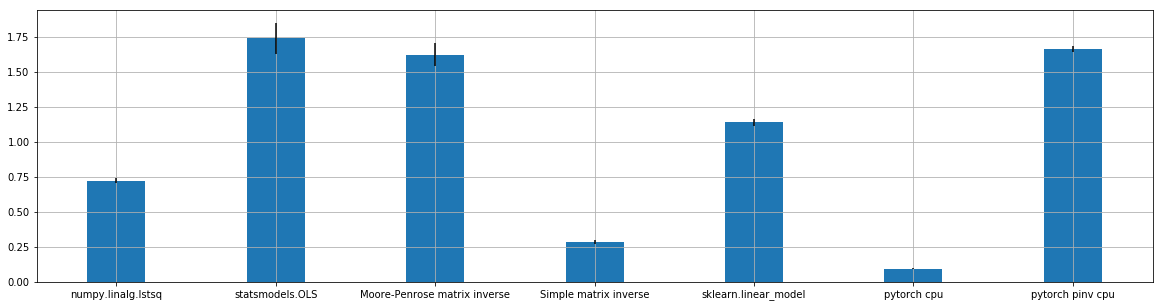

In [77]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(x=[l*1.1 for l in range(len(times))],
        height=times, 
        width=0.4,
        yerr=err,
        tick_label=[
            'numpy.linalg.lstsq',
            'statsmodels.OLS',
            'Moore-Penrose matrix inverse',
            'Simple matrix inverse',
            'sklearn.linear_model',
            'pytorch cpu',
            'pytorch pinv cpu',
#             'pytorch cuda'
        ])
plt.show()

In [244]:
n_min = 1000
n_max = int(1e5)
n_levels = 25
r = np.log10(n_max/n_min)
l = np.linspace(0,r,n_levels)
n_data = list((n_min*np.power(10,l)))
n_data = [int(n) for n in n_data]

In [245]:
methods = {
    'linalg.lstsq': linalg_lstsq, 
    'statsmodels.OLS': statsmodel_ols,
    'Moore-Penrose matrix inverse': moore_penrose,
    'Simple matrix inverse': simple_matrix_inverse,
    'sklearn.linear_model': sklearn_linear_regression,
    'pytorch cpu': pytorch_matrix_inverse_cpu,
    'pytorch pinv cpu': pytorch_moore_penrose_cpu,
#     'pytorch cuda': pytorch_matrix_inverse_cuda
}
l1 = methods.keys()
time_dict = {key:[] for key in l1}

from tqdm import tqdm

for i in tqdm(range(len(n_data))):
    n = n_data[i]
#     x, y, _ = gen_data(n)
    x, y, _ = gen_data(n, categorical_features=[(100, 25), (50, 55)], continuous_features=[500.0])
    for method in methods:
#         dt = %timeit -o methods[method](x, y, prt=False)
#         time_dict[method].append(dt.average*1e3)
        dt = 0
        try:
            dt = methods[method](x, y, prt=False)
        except Exception as e:
            print(str(e))
        time_dict[method].append(dt*1e3)

  0%|          | 0/25 [00:00<?, ?it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
  4%|▍         | 1/25 [00:00<00:04,  5.24it/s]

categorical features: 100
categorical features: 50
total features size 153 
categorical features: 100
categorical features: 50
total features size 153 


/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
  8%|▊         | 2/25 [00:00<00:04,  5.58it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
 12%|█▏        | 3/25 [00:00<00:03,  5.89it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precis

categorical features: 100
categorical features: 50
total features size 153 
Singular matrix
categorical features: 100
categorical features: 50
total features size 153 


 16%|█▌        | 4/25 [00:00<00:03,  5.84it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
 20%|██        | 5/25 [00:00<00:03,  5.67it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 
Singular matrix
categorical features: 100
categorical features: 50
total features size 153 


 24%|██▍       | 6/25 [00:01<00:03,  5.30it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 28%|██▊       | 7/25 [00:01<00:03,  4.71it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 32%|███▏      | 8/25 [00:01<00:04,  4.24it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 
Singular matrix


 36%|███▌      | 9/25 [00:01<00:04,  3.85it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 40%|████      | 10/25 [00:02<00:04,  3.37it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 44%|████▍     | 11/25 [00:02<00:04,  2.96it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 48%|████▊     | 12/25 [00:03<00:05,  2.56it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 52%|█████▏    | 13/25 [00:03<00:05,  2.20it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 56%|█████▌    | 14/25 [00:04<00:05,  1.84it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 60%|██████    | 15/25 [00:05<00:06,  1.52it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 64%|██████▍   | 16/25 [00:06<00:07,  1.24it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 68%|██████▊   | 17/25 [00:08<00:07,  1.03it/s]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 72%|███████▏  | 18/25 [00:09<00:08,  1.19s/it]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 76%|███████▌  | 19/25 [00:11<00:08,  1.48s/it]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 80%|████████  | 20/25 [00:14<00:09,  1.81s/it]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 84%|████████▍ | 21/25 [00:17<00:09,  2.26s/it]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 88%|████████▊ | 22/25 [00:21<00:08,  2.79s/it]/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


categorical features: 100
categorical features: 50
total features size 153 


 92%|█████████▏| 23/25 [00:26<00:06,  3.49s/it]

categorical features: 100
categorical features: 50
total features size 153 


/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
 96%|█████████▌| 24/25 [00:32<00:04,  4.24s/it]

categorical features: 100
categorical features: 50
total features size 153 


/Users/emmanuel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
100%|██████████| 25/25 [00:40<00:00,  5.23s/it]


In [246]:
df = pd.DataFrame(data=time_dict)
df

,linalg.lstsq,statsmodels.OLS,Moore-Penrose matrix inverse,Simple matrix inverse,sklearn.linear_model,pytorch cpu,pytorch pinv cpu
0,16.925812,36.279917,21.480083,7.006884,50.262213,3.748178,27.233124
1,15.444994,35.363197,25.007010,7.725239,26.381254,3.230810,28.787851
2,16.582012,32.083035,24.847269,0.000000,28.357744,2.588987,31.392097
3,19.291162,35.498142,29.584885,8.771896,32.284975,2.856016,36.728859
4,19.520998,43.171167,32.966137,0.000000,33.571005,2.674103,39.925098
5,24.814129,46.253920,33.115149,10.450840,38.212061,5.772114,46.854973
6,27.588129,53.572893,45.699120,11.948824,44.046164,4.309177,66.970825
7,33.597946,61.456919,43.902874,12.899876,47.684193,4.889250,65.670967
8,37.915945,63.301802,49.817801,0.000000,53.831816,6.114006,76.775312
9,43.691874,79.740286,59.824944,17.276764,71.390152,6.096125,84.068060


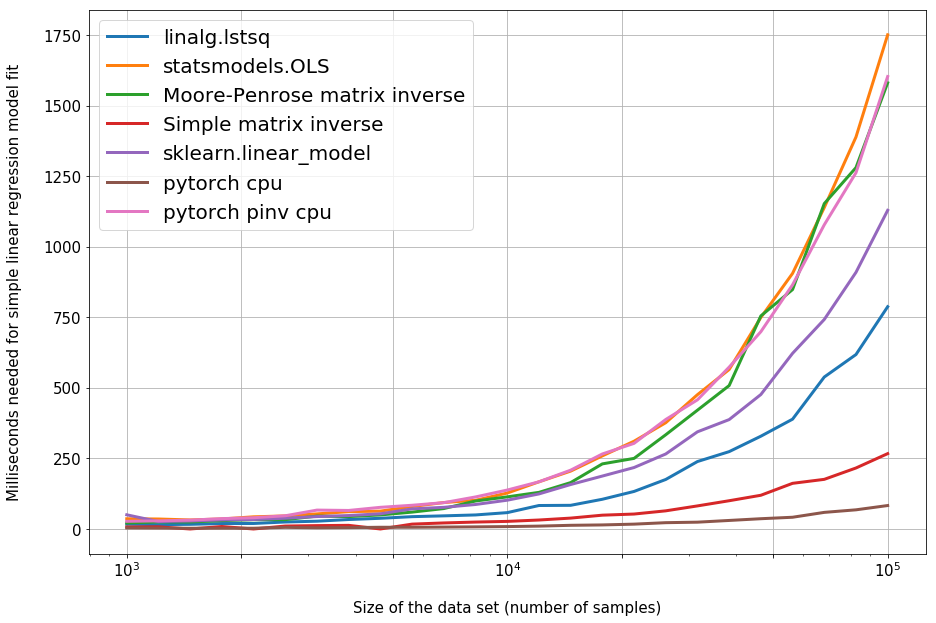

In [247]:
plt.figure(figsize=(15,10))
for i in df.columns:
    plt.semilogx((n_data),df[i],lw=3)
# plt.xticks([1e5,2e5,5e5,1e6,2e6,5e6,1e7],fontsize=15)
plt.xticks([1e3,2e3,5e3,1e4,2e4,5e4,1e5],fontsize=15)
plt.xlabel("\nSize of the data set (number of samples)",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Milliseconds needed for simple linear regression model fit\n",fontsize=15)
plt.grid(True)
plt.legend([name for name in df.columns],fontsize=20)

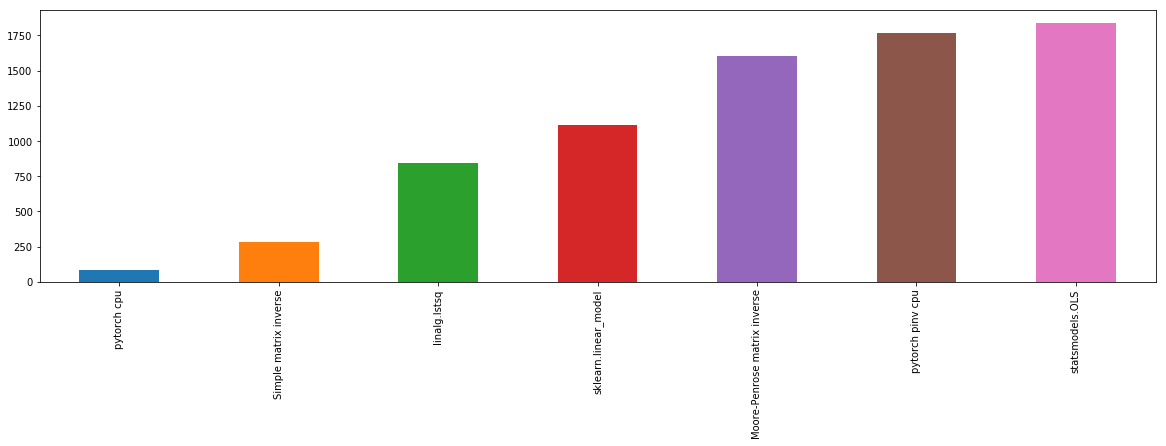

In [83]:
a1=df.iloc[n_levels-1].sort_values()
df.iloc[n_levels-1].sort_values().plot.bar(figsize=(20,5))

In [ ]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(left=[l*0.8 for l in range(len(times))],height=a1, width=0.4,
        tick_label=list(a1.index))
plt.show()